In [1]:
library(tidyverse)

source('../utils/plottingUtilities.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: scales


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: grid



In [2]:
# original images 
x <- read.csv('../data/clean_x_2020.csv')[, -1]

# Load instabilities

In [3]:
results_dir <- '../model_fits/nmf_fits/staNMFDicts/'

In [12]:
k1 <- 3 # smallest number for K
k2 <- 20 # largest number for K

In [14]:
stabilities <- c()
for(k in k1:k2){
    stability_file_k <- paste0(results_dir, 'K=', k, '/instability.csv')
    
    if(!file.exists(stability_file_k)){
        cat('WARNING: instability file for k =', k, 'does not exist\n') 
        next
    }
    stabilities <- rbind(stabilities, 
                         read.csv(stability_file_k, sep = ',', header = FALSE))
}

colnames(stabilities) <- c('n_pp', 'instability')

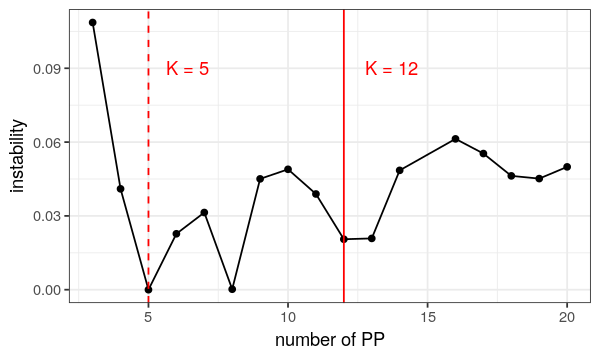

In [15]:
# plot instabilities as a function of K
options(repr.plot.width = 5, repr.plot.height = 3)
stabilities %>% 
    ggplot() + geom_point(aes(x = n_pp, y = instability)) + 
                geom_line(aes(x = n_pp, y = instability)) + 
        xlab('number of PP') + theme_bw() + 
        geom_vline(xintercept = 5, color = 'red', linetype = 'dashed') + 
            annotate("text", x=6.4, y=0.09, label= "K = 5", color = 'red') +
        geom_vline(xintercept = 12, color = 'red', linetype = 'solid') + 
            annotate("text", x=13.7, y=0.09, label= "K = 12", color = 'red') 
#         geom_vline(xintercept = 19, color = 'blue', linetype = 'dashed') + 
#             annotate("text", x=20.7, y=0.09, label= "K = 19", color = 'blue') 


# check out error in fit 

Here, we plot the l2 error in the fit as a function of the number of principal patterns

In [21]:
l2_errors <- data.frame(n_pp = c(), error = c())

for(k in k1:k2){
    
    alpha_file <- paste0(results_dir, '/K=', k, '/alpha_99.csv')
    
    if(!file.exists(alpha_file)){
        cat('WARNING: alpha file for k =', k, 'does not exist\n') 
        next
    }
    
    
    alpha <- read.csv(alpha_file)[, -1]
    dict <- read.csv(paste0(results_dir, '/K=', k, '/factorization_99.csv'), header = FALSE)[, -1]
    
    residual <- x - as.matrix(dict) %*% as.matrix(alpha)
    error <- sum(residual**2)
        
    l2_errors <- rbind(l2_errors, data.frame(n_pp = k, error = error))
}

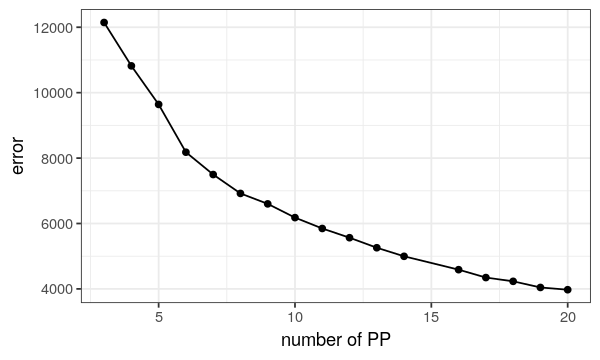

In [27]:
options(repr.plot.width = 5, repr.plot.height = 3)
l2_errors %>% 
    ggplot() + geom_point(aes(x = n_pp, y = error)) + 
                geom_line(aes(x = n_pp, y = error)) + 
        xlab('number of PP') + theme_bw()

look at individual errors

In [28]:
# corr_df <- data.frame(n_pp = c(), corr = c(), gene = c())

# for(k in k1:k2){
#     alpha <- read.csv(paste0(results_dir, '/K=', k, '/alpha_99.csv'))[, -1]
#     dict <- read.csv(paste0(results_dir, '/K=', k, '/factorization_99.csv'), header = FALSE)[, -1]

#     correlation <- diag(cor(x, as.matrix(dict) %*% as.matrix(alpha)))
        
#     corr_df <- rbind(corr_df, data.frame(n_pp = k, 
#                                              error = as.vector(correlation), 
#                                              gene = names(correlation)))
# }

In [29]:
# corr_df %>% 
#     ggplot() + geom_boxplot(aes(x = as.factor(n_pp), y = error))

# Check out PPs

In [30]:
# need the template
load('../data/lateData.Rdata')

[1] 1 2 3 4 5

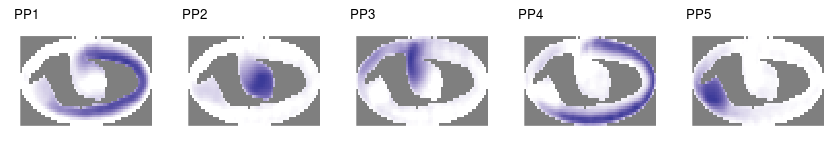

In [31]:
# choose a K
K <- 5

# read in dictionary 
# for now, we just pick any restart ... 
pp_file_k <- paste0(results_dir, 'K=', K, '/factorization_99.csv')
PPs <- read.csv(file = pp_file_k, header = FALSE)

options(repr.plot.width = 7, repr.plot.height = 1.2)

plot_all_PPs(PPs[, -1], late$template)

[1] 1 2 3 4 5 6 7 8

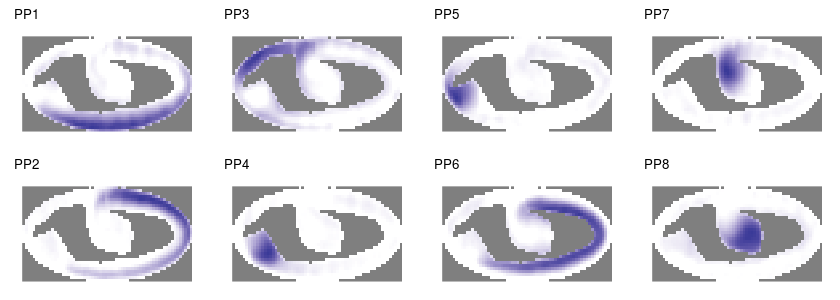

In [32]:
### choose a K
K <- 8

# read in dictionary 
# for now, we just pick any restart ... 
pp_file_k <- paste0(results_dir, 'K=', K, '/factorization_99.csv')
PPs <- read.csv(file = pp_file_k, header = FALSE)

options(repr.plot.width = 7, repr.plot.height = 2.5)

plot_all_PPs(PPs[, -1], late$template, ncols = 4)

[1]  1  2  3  4  5  6  7  8  9 10 11 12

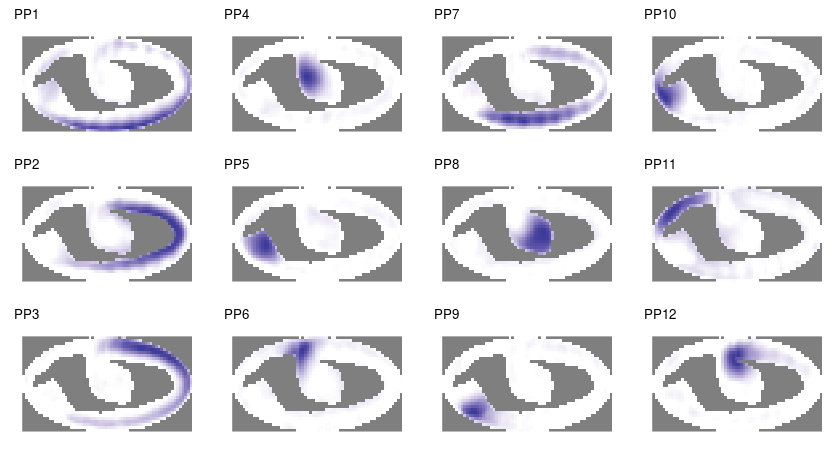

In [33]:
### choose a K
K <- 12

# read in dictionary 
# for now, we just pick any restart ... 
pp_file_k <- paste0(results_dir, 'K=', K, '/factorization_99.csv')
PPs <- read.csv(file = pp_file_k, header = FALSE)

options(repr.plot.width = 7, repr.plot.height = 2.5*1.5)

plot_all_PPs(PPs[, -1], late$template, ncols = 4)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13

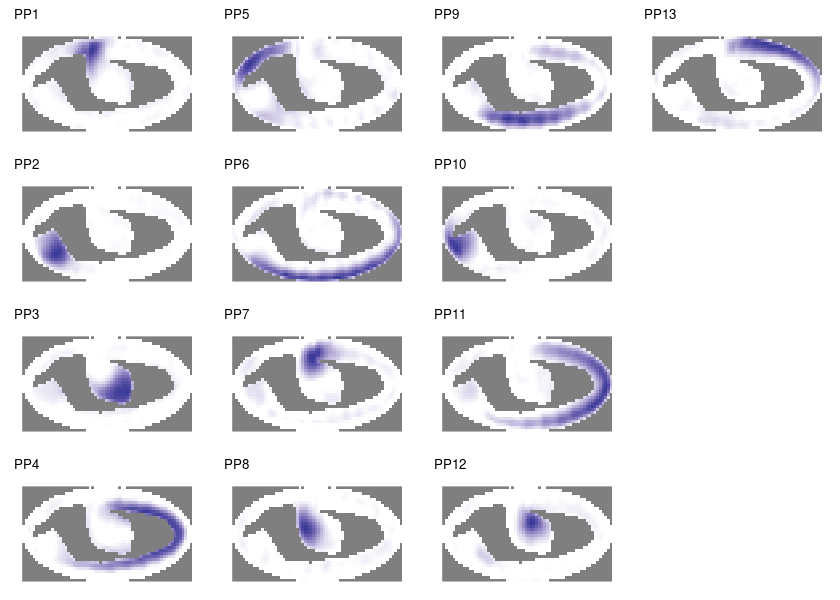

In [36]:
### choose a K
K <- 13

# read in dictionary 
# for now, we just pick any restart ... 
pp_file_k <- paste0(results_dir, 'K=', K, '/factorization_99.csv')
PPs <- read.csv(file = pp_file_k, header = FALSE)

options(repr.plot.width = 7, repr.plot.height = 5)

plot_all_PPs(PPs[, -1], late$template, ncols = 4)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19

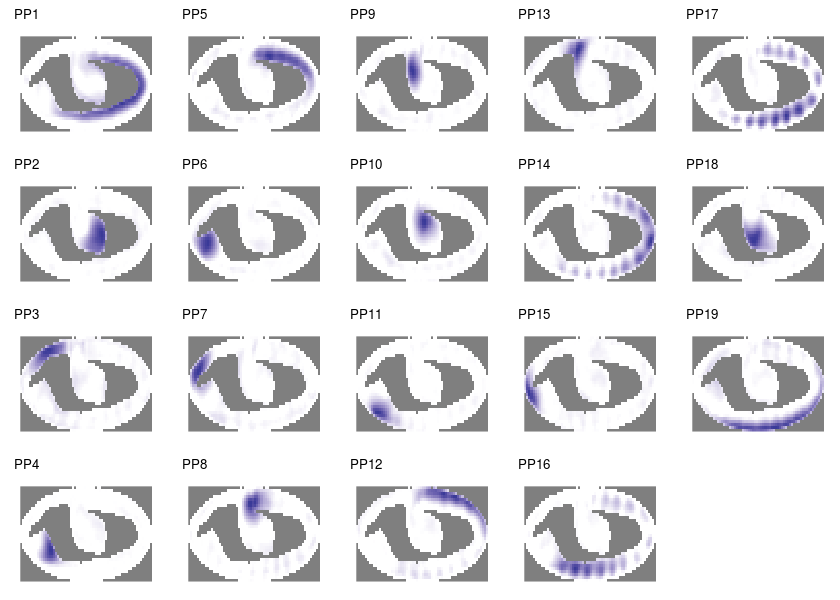

In [37]:
# choose a K
K <- 19

# read in dictionary 
# for now, we just pick any restart ... 
pp_file_k <- paste0(results_dir, 'K=', K, '/factorization_99.csv')
PPs <- read.csv(file = pp_file_k, header = FALSE)

options(repr.plot.width = 7, repr.plot.height = 5)

plot_all_PPs(PPs[, -1], late$template)

# Pull gene lists

In [38]:
alpha <- read.csv(paste0(results_dir, '/K=', 12, '/alpha_99.csv'))[, -1]

In [39]:
dict <- read.csv(paste0(results_dir, '/K=', 12, '/factorization_99.csv'), header = FALSE)[, -1]

In [40]:
reconstruction <- as.matrix(dict) %*% as.matrix(alpha)

In [41]:
# normalize coefficients 
normalize_vec <- function(x){
    return(x / sum(x))
}

In [42]:
alpha_normalized <- apply(alpha, 2, normalize_vec)

In [63]:
for(i in 1:dim(alpha_normalized)[1]){
    coeffs <- alpha_normalized[i, ]
    
    coeffs <- coeffs[!is.na(coeffs)]
    coeffs <- coeffs[coeffs > 0.5]
    coeffs <- sort(coeffs, decreasing = TRUE)
    
    print(i)
    
    # clean coefficient names: 
    # list only one replicate
    gene_names_raw <- names(coeffs)
    gene_names_clean <- unique(gsub("\\..*","",gene_names_raw))
    
    cat(paste(gene_names_clean, sep = ','))
    
    cat('\n')
    cat('\n')
}

[1] 1
ac Ubx gsb sens mthl5 CG11456 HLHm3 hb fd96Ca

[1] 2
bap CG12744 wgn meso18E net tin twi_a eya_b l Him retn Mef2 CG5899

[1] 3
ey svp rho CG8654 Uev1A Sulf1 en CG12489_b CG6327 unpg Trim9 CG12909 CG2865 BicD loner CG13624_b SoxN nvy Nrt CG9663 dnc

[1] 4
fng skl noc otp_a otp_c prd_b byn prd_c emc CG8443 otp_e Mkp3 scat CG8306 CG8001 CG8960 Prx2540 CG10176 HLH54F bnb CG5295 cad Rab23

[1] 5
Hel89B ham CG4322 CG3597 RhoL CG6070 toy Oscillin Pros54 su ttk_a ppl CG7966 Dip CG32423 Dp1 Aldh UGP CG3838_a CrebA Keap1 vri gcm_b gcm_a Grp1 gcm2 CG1234 CG9246 ImpE2 CG6854 knrl MESR3 CG6563_a

[1] 6
pgc CG11275 kay Ance_b tup_b otp_d otp_b CG17390

[1] 7
nerfin Scr Tulp ara CG2083 CG6398 Obp99a

[1] 8
Ptx1 Ugt36Bc exex piwi CG9925 Chd64 aret CG9232 CG9467 Thor Pdp1 Rel CG13290 ttk_b Aplip1 sc_b CG7224 CG31431 ebi_a for term_b Rapgap1 m2 gem awd CG5828 Cct1 CG14801 GATAe dm

[1] 9
Dfd kn Mvl lab_a Dr_c cnc srp_a HGTX_a CG9171 Tapdelta Dr_a Dr_b

[1] 10
croc Neu2 Wnt4 CG8388 CG12537 for Gsc 

# example of a reconstruction

In [44]:
ls()

[1] "alpha"            "alpha_file"       "alpha_normalized" "coeffs"          
 [5] "dict"             "error"            "generateImage"    "getNodeImages"   
 [9] "getNodeLabel"     "getNodePosition"  "i"                "img2Color"       
[13] "k"                "K"                "k1"               "k2"              
[17] "l2_errors"        "late"             "mapLate2Early"    "multiplot"       
[21] "normalize_vec"    "overlayImage"     "overlayImages"    "plot_all_PPs"    
[25] "plotGroupImg"     "plotImg"          "plotPP"           "pp_file_k"       
[29] "PPs"              "reconstruction"   "residual"         "results_dir"     
[33] "shiftHoriz"       "shiftImg"         "shiftVert"        "stabilities"     
[37] "stability_file_k" "tf"               "x"

In [49]:
which_gene <- 'pnr'

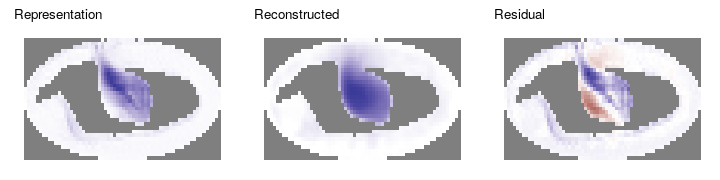

In [50]:
options(repr.plot.width = 6, repr.plot.height = 1.5)
p <- list()
p[[1]] <- plotImg(late$x[, which_gene], late$template, FALSE, 'Representation')
p[[2]] <- plotImg(reconstruction[, which_gene], late$template, FALSE, 'Reconstructed')
p[[3]] <- plotImg(late$x[, which_gene] - reconstruction[,which_gene], late$template, FALSE, 'Residual')

multiplot(plotlist = p, cols = 3)

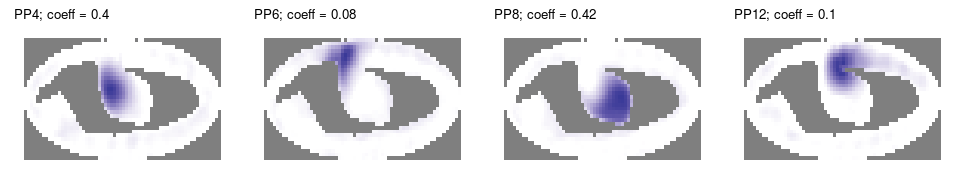

In [52]:
which_dict <- which(alpha_normalized[, which_gene] > 0)

p <- list()
for (i in 1:length(which_dict)){
    p[[i]] <- plotImg(dict[, which_dict[i]], late$template, FALSE, 
                      paste0('PP', which_dict[i], '; coeff = ', 
                             round(alpha_normalized[which_dict[i], which_gene], 2)))
}

options(repr.plot.width = 2 * length(which_dict), repr.plot.height = 1.5)
multiplot(plotlist = p, cols = length(which_dict))

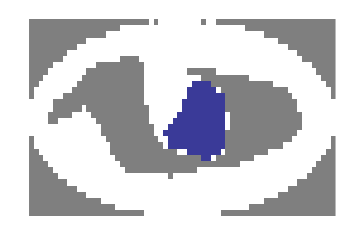

In [53]:
options(repr.plot.width = 3, repr.plot.height = 2)

plotImg(dict[, 8] > quantile(dict[, 8], 0.9), late$template, FALSE)